In [1]:
import sklearn 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import datetime

In [2]:
automobile_df = pd.read_csv('cars.csv')

automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [3]:
automobile_df.shape

(394, 12)

In [4]:
# Replace the '?' with NaN values

automobile_df = automobile_df.replace('?', np.nan)

automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [5]:
# Check missing values in columns
# Some columns have noticable numbers of NaNs
automobile_df.isna().sum()

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [6]:
# Fill NaN in MPG column with the mean of the MPG column
# Reconfirm to now be sure MPG has no NaNs again.
automobile_df['MPG'] = automobile_df['MPG'].fillna(automobile_df['MPG'].mean())

automobile_df.isna().sum()

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [7]:
automobile_df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [8]:
# Drop other NaNs in the entire dataframe
automobile_df = automobile_df.dropna()

In [9]:
automobile_df.shape

(387, 12)

In [10]:
automobile_df.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [11]:
# Drop the string column 'Model' since its not needed for ML
automobile_df.drop(['Model'], axis = 1, inplace = True)

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
3,16.000000,8,304,150,3433,12,1970,US,3.19,3.40,10
4,17.000000,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan",3.19,3.40,8.5
7,23.551429,8,440,215,4312,8.5,1970,US,3.19,3.40,8.5


In [12]:
# Scale down the dataset by removing some columns
automobile_df.drop(['bore', 'stroke', 'compression-ratio'], inplace = True, axis = 1)

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [13]:
# Check how many values in the 'Year' column is numeric and how many are not
automobile_df['Year'].str.isnumeric().value_counts()

True     351
False     36
Name: Year, dtype: int64

In [14]:
# List out htose values that are captured as not numeric

automobile_df['Year'].loc[automobile_df['Year'].str.isnumeric() == False]

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [15]:
# Extract only the first four digits from 'Year' values

extr = automobile_df['Year'].str.extract(r'^(\d{4})', expand = False)

extr.head()

0    1970
3    1970
4    1970
6    1970
7    1970
Name: Year, dtype: object

In [16]:
automobile_df['Year'].isnull().values.any()

False

In [17]:
# Populate the 'Year' column with the extracted 4 digits year values
automobile_df['Year'] = pd.to_numeric(extr)
automobile_df['Year'].dtype

dtype('int64')

In [18]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970,"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970,US]
6,14.000000,8,454,220,4354,9,1970,"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


Add an Age Column

In [19]:
automobile_df['Age'] = datetime.datetime.now().year - automobile_df['Year']

automobile_df.drop(['Year'], axis=1, inplace=True)

automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
198,18.0,6,250,78,3574,21,US,44
360,26.6,8,350,105,3725,19,US,39
87,14.0,8,302,137,4042,14.5,US,47
341,35.1,4,81,60,1760,16.1,Japan,39
83,27.0,4,97,88,2100,16.5,Japan,48


In [20]:
automobile_df.dtypes

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [21]:
# Check to see if null values exist in the 'Cylinders' column
automobile_df['Cylinders'].isnull().values.any()

False

In [22]:
automobile_df['Cylinders'].str.isnumeric().value_counts()

True     378
False      9
Name: Cylinders, dtype: int64

In [23]:
# Values that are not numeric are represented by dashes
automobile_df['Cylinders'].loc[automobile_df['Cylinders'].str.isnumeric() == False]

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [24]:
# Get the mean of other values that are not dashes
# Store the mean as 'cmean'

cylinders = automobile_df['Cylinders'].loc[automobile_df['Cylinders'] != '-']

cmean = cylinders.astype(int).mean()

In [25]:
# Now replace all the dashes with the mean value

automobile_df['Cylinders'] = automobile_df['Cylinders'].replace('-', cmean).astype(int)

In [26]:
automobile_df.head(30)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307,130,3504,12,"US; Detroit, Michigan",50
3,16.000000,8,304,150,3433,12,US,50
4,17.000000,8,302,140,3449,10.5,US],50
6,14.000000,8,454,220,4354,9,"US; Detroit, Michigan",50
7,23.551429,8,440,215,4312,8.5,US,50
8,14.000000,8,455,225,4425,8.5,US,50
9,15.000000,8,390,190,3850,8.5,US],50
10,15.000000,8,383,170,3563,10,US,50
11,14.000000,5,340,160,3609,8,US,50
12,23.551429,8,400,150,3761,9.5,"US; Detroit, Michigan",50


In [27]:
automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [28]:
# Change 'Displacement' to numeric data type

automobile_df['Displacement'] = pd.to_numeric(automobile_df['Displacement'], errors = 'coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [29]:
# Change 'Weight' to numeric data type

automobile_df['Weight'] = pd.to_numeric(automobile_df['Weight'], errors = 'coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration     object
Origin           object
Age               int64
dtype: object

In [30]:
# Change 'Acceleration' to numeric data type

automobile_df['Acceleration'] = pd.to_numeric(automobile_df['Acceleration'], errors = 'coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [31]:
automobile_df['Origin'].head(15)

0     US; Detroit, Michigan
3                        US
4                       US]
6     US; Detroit, Michigan
7                        US
8                        US
9                       US]
10                       US
11                       US
12    US; Detroit, Michigan
13                       US
14             Japan; Aichi
15                       US
16                      US]
17                       US
Name: Origin, dtype: object

In [32]:
# Check the unique categories of Orign in the dataset
# Some countries have specific state names attached

automobile_df['Origin'].unique()

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [33]:
# Where 'US' appears concentrate all under a common name 'US'

automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('US'),
                                  'US',
                                  automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [34]:
# Where 'Japan' appears, concentrate all under a common name 'Japan'

automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Japan'),
                                  'Japan',
                                  automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe-Germany', 'Europe', 'Europe Germany'],
      dtype=object)

In [35]:
# Where 'Europe' appears, concentrate all under a common name 'Europe'

automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Europe'),
                                  'Europe',
                                  automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [36]:
# View the cleaned dataset
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,50
3,16.000000,8,304.0,150,3433,12.0,US,50
4,17.000000,8,302.0,140,3449,10.5,US,50
6,14.000000,8,454.0,220,4354,9.0,US,50
7,23.551429,8,440.0,215,4312,8.5,US,50


In [37]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,43.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,41.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,44.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


In [38]:
# Save the cleaned dataset in csv format

automobile_df.to_csv('cards processed.csv', index = False)

# Visualizing Relationships

In [39]:
import matplotlib.pyplot as plt

In [40]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,50
3,16.000000,8,304.0,150,3433,12.0,US,50
4,17.000000,8,302.0,140,3449,10.5,US,50
6,14.000000,8,454.0,220,4354,9.0,US,50
7,23.551429,8,440.0,215,4312,8.5,US,50


Text(0, 0.5, 'Miles per gallon')

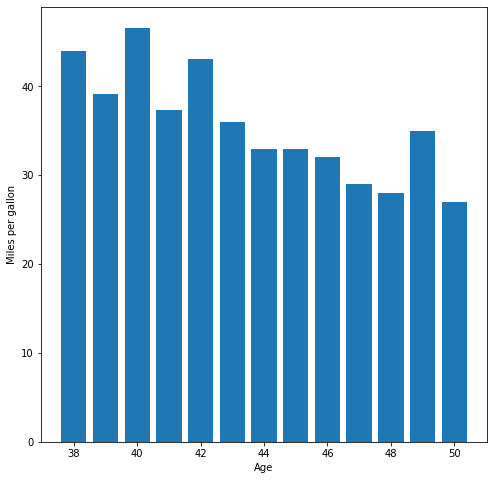

In [41]:
plt.figure(figsize=(8, 8))

plt.bar(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

# Aged cars have lower miles per gallon

Text(0, 0.5, 'Miles per gallon')

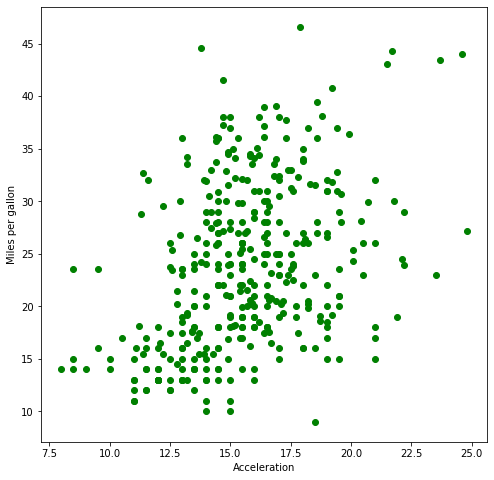

In [42]:
 plt.figure(figsize=(8, 8))
    
 plt.scatter(automobile_df['Acceleration'], automobile_df['MPG'], color='g')

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

# Higher acceleration means higher miles per gallon

Text(0, 0.5, 'Miles per gallon')

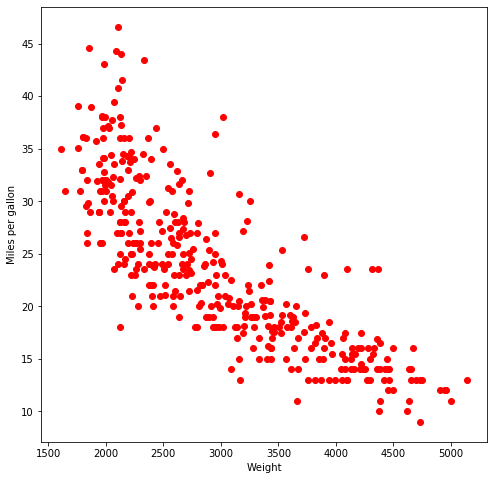

In [43]:
plt.figure(figsize=(8, 8))
    
plt.scatter(automobile_df['Weight'], automobile_df['MPG'], color='r')

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

# Higher the weight means higher miles per gallon

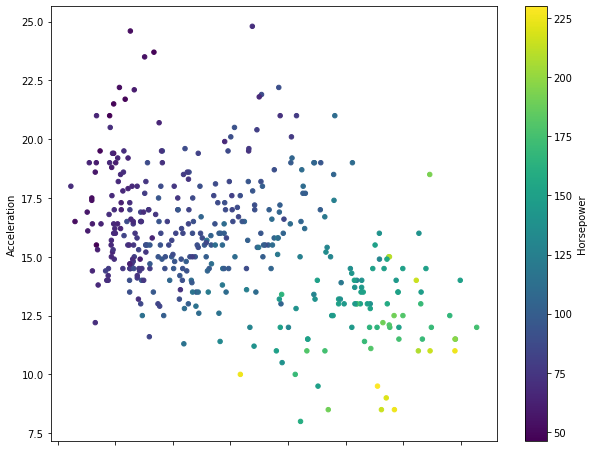

In [44]:
automobile_df.plot.scatter(x='Weight',
                          y='Acceleration',
                          c='Horsepower',
                          colormap='viridis',
                          figsize=(10, 8));

Text(0, 0.5, 'Miles per gallon')

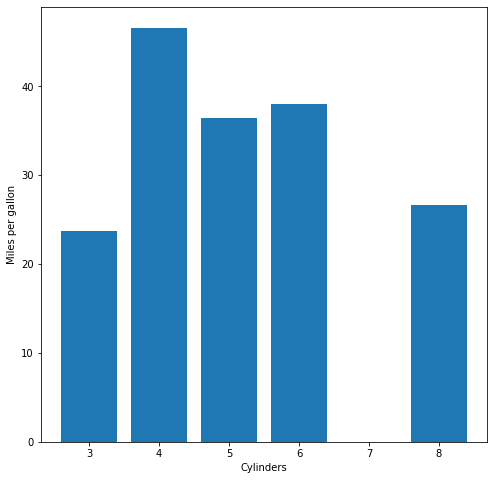

In [45]:
plt.figure(figsize=(8, 8))

plt.bar(automobile_df['Cylinders'], automobile_df['MPG'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

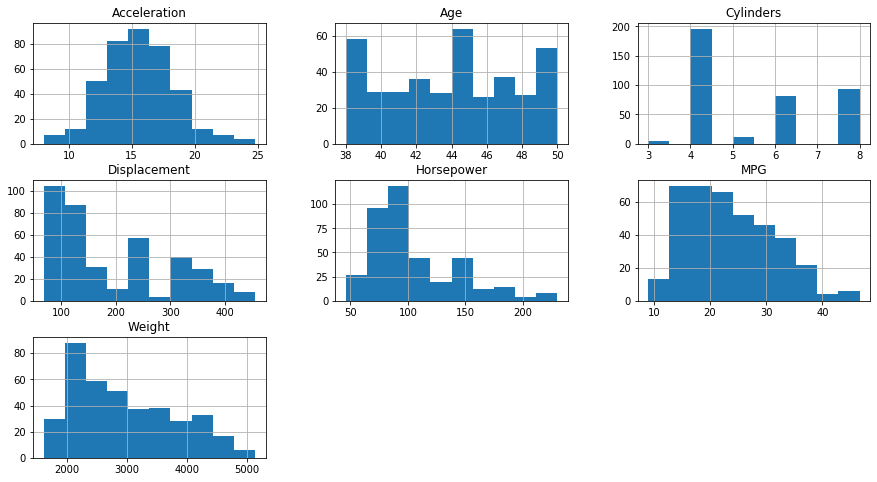

In [46]:
# This gives th edistribution of values from the column
automobile_df.hist(figsize=(15, 8))
plt.show()